# Análisis de la base de datos: Common Voice - es

En este Notebook busco leer los tsv que vienen con la base de datos y tomar decisiones a partir de los datos 

In [1]:
import numpy as np
import pandas as pd
import os
import shutil

In [2]:
os.chdir(r'C:\Users\maxia\Desktop\Facultad\Labo de acústica\Codigo')

Me fijo en los audios validados

In [3]:
validados = pd.read_csv('validated.tsv', sep='\t')
validados.head()

,client_id,path,sentence,up_votes,down_votes,age,gender,accent,locale,segment
0,0003b969350f5308dc7347c574bc291834f38fdd92a286...,common_voice_es_19698530.mp3,Habita en aguas poco profundas y rocosas.,2,1,thirties,male,mexicano,es,NaN
1,009891ef9a0c11e1b21a9d8a8318c493382963c9eac3ab...,common_voice_es_19987333.mp3,Opera principalmente vuelos de cabotaje y regi...,2,1,NaN,NaN,NaN,es,NaN
2,00b0a5cf01f152b2b6771f16e34118a1d95e29716e4c86...,common_voice_es_19691402.mp3,Para visitar contactar primero con la dirección.,2,0,NaN,NaN,NaN,es,NaN
3,00be171a195e0dc92ceeb79da60907dff8eefa30ce68ba...,common_voice_es_22044222.mp3,tres,2,0,NaN,NaN,NaN,es,Benchmark
4,00de0234aec2cb4d2268ef5b5ba1d72d84ce36fa032096...,common_voice_es_19966634.mp3,"Realizó los estudios primarios en Francia, par...",2,1,NaN,NaN,NaN,es,NaN


In [4]:
validados['gender'].describe()

count     172519
unique         3
top         male
freq      124383
Name: gender, dtype: object

In [5]:
validados['gender'].unique()

array(['male', nan, 'female', 'other'], dtype=object)

In [8]:
genero = validados['gender']

male, female = 0, 0
for i in range(len(genero)):
    if genero[i] == 'male':
        male+=1

    elif genero[i] == 'female':
        female+=1

    elif genero[i] != 'male' and genero[i] != 'female'  :
        genero[i] = 'other'

#print(f'Hay {male} audios de hombres, {female} audios de mujeres, {other} otros y {not_specified} no especificados')


C:\Users\maxia\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [12]:
print(male)

124383


In [9]:
genero.unique()
validados['gender'] = genero

In [10]:
print(len(genero))
print(len(validados['gender']))
print(len(validados))

236314
236314
236314


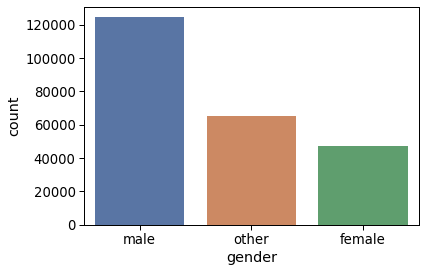

In [11]:
import seaborn as sns

sns.set_context('paper',font_scale=1.5)
sns.countplot(x='gender',data=validados, palette='deep')

Efectivamente, hay más cantidad de hombres que de mujeres! Con lo cual, agarro 6600 audios de hombres entonces! así uso 5000 para entrenar, 1250 para testeo y 350 de más por si los audios llegan a durar menos de 2.04 segundos y me quede corto

In [18]:
male_audios = []
count = 0
i=0

while count < 6600:
    if genero[i] == 'male':
        male_audios.append(validados['path'][i])
        i+=1
        count+=1
    else:
        i+=1

print(i)
print(len(male_audios))
print(validados['gender'][i])
print(validados['gender'][i-1])

47184
6600
male
male


In [19]:
audios_validados = male_audios
print(audios_validados[0])
print(audios_validados[-1])

common_voice_es_19698530.mp3
common_voice_es_21812592.mp3


In [20]:
np.save('audios_validados', audios_validados) #Guardo los audios

In [2]:
# próximo paso es mover los audios a una carpeta y después la parte de leerlos la hago en el script 3_armo_base_de_datos
os.chdir(r'C:\Users\maxia\Desktop\Facultad\Labo de acústica\Codigo')
audios_validos = np.load('audios_validados.npy')

In [3]:
os.chdir(r'C:\Users\maxia\Desktop\Facultad\Labo de acústica\cv-corpus-6.1-2020-12-11\es\clips')
path_to_move ='C:/Users/maxia/Desktop/Facultad/Labo de acústica/Codigo/1_validados'

i=0

for audio_valido in audios_validos:
    i+=1
    shutil.move(audio_valido, path_to_move)

    print(f'Se movieron {i} audios')

 audios
Se movieron 5768 audios
Se movieron 5769 audios
Se movieron 5770 audios
Se movieron 5771 audios
Se movieron 5772 audios
Se movieron 5773 audios
Se movieron 5774 audios
Se movieron 5775 audios
Se movieron 5776 audios
Se movieron 5777 audios
Se movieron 5778 audios
Se movieron 5779 audios
Se movieron 5780 audios
Se movieron 5781 audios
Se movieron 5782 audios
Se movieron 5783 audios
Se movieron 5784 audios
Se movieron 5785 audios
Se movieron 5786 audios
Se movieron 5787 audios
Se movieron 5788 audios
Se movieron 5789 audios
Se movieron 5790 audios
Se movieron 5791 audios
Se movieron 5792 audios
Se movieron 5793 audios
Se movieron 5794 audios
Se movieron 5795 audios
Se movieron 5796 audios
Se movieron 5797 audios
Se movieron 5798 audios
Se movieron 5799 audios
Se movieron 5800 audios
Se movieron 5801 audios
Se movieron 5802 audios
Se movieron 5803 audios
Se movieron 5804 audios
Se movieron 5805 audios
Se movieron 5806 audios
Se movieron 5807 audios
Se movieron 5808 audios
Se movie

# TODO LO QUE ESTÁ ABAJO ES VIEJO!!!

In [4]:
validados['path'].apply(len)

0         28
1         28
2         28
3         28
4         28
          ..
236309    28
236310    28
236311    28
236312    28
236313    28
Name: path, Length: 236314, dtype: int64

Entonces: la base de datos tiene 421745 pero solo cuento con 236314 audios validados!

Es decir, voy a trabajar con solo el 56% de la base de datos en español.

In [6]:
audios_validos = validados['path'].values.tolist()
print(audios_validos[0])
print(type(audios_validos[0]))

common_voice_es_19698530.mp3
<class 'str'>


Guardo este en un .npy para utilizarlo en otros scripts!

In [26]:
os.chdir(r'C:\Users\maxia\Desktop\Facultad\Labo de acústica\Codigo')
np.save('audios_validados.npy', audios_validos)

In [2]:
os.chdir(r'C:\Users\maxia\Desktop\Facultad\Labo de acústica\Codigo')
audios_validos = np.load('audios_validados.npy')

¿Con cuántas horas de entrenamiento cuento? Veamos

Para esto, voy a cargar los audios que necesito y crear una columna que contenga la duración de los mismos

In [5]:
# Hago una prueba
import sounddevice as sd
os.chdir(r'C:\Users\maxia\Desktop\Facultad\Labo de acústica\Codigo\cv-corpus-6.1-2020-12-11\es\clips')
data, fs = load(audios_validos[89000], sr=16000)
sd.play(data, fs)
print(data)
print(fs)



C:\Users\maxia\Anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.5012367e-05 1.5393616e-05
 1.5219360e-05]
16000


In [15]:
from librosa import load
import glob
os.chdir(r'C:\Users\maxia\Desktop\Facultad\Labo de acústica\Codigo\cv-corpus-6.1-2020-12-11\es\clips')


In [14]:
print(audios_validos[0])

common_voice_es_19698530.mp3


In [19]:
def cargo_audios(audios_validos):
    i=0
    audios_validos=audios_validos
    duration = []
    clean_audios = {}
    for audios in audios_validos:
        for dir in glob.iglob(audios, recursive=True):
            #i+=1
            print(audio)
            data, fs = load(dir, sr=16000)
            duracion = len(data)/fs #Duración en segundos del audio
            clean_audios[audio] = data
            duration.append(duracion)
            #print(i)
    #return duration, clean_audios

#duration, clean_audios = map(cargo_audios, audios_validos)


duration = []
clean_audios = {}
SampleRate = []
i=0

for filename in audios_validos:
    for dir in glob.iglob(filename, recursive=True):
        i+=1
        data, fs = load(filename, sr=None)
        duracion = len(data)/fs #Duración en segundos del audio
        clean_audios[filename] = data
        SampleRate.append(fs)
        duration.append(duracion)
        print(i)


21
6022
6023
6024
6025
6026
6027
6028
6029
6030
6031
6032
6033
6034
6035
6036
6037
6038
6039
6040
6041
6042
6043
6044
6045
6046
6047
6048
6049
6050
6051
6052
6053
6054
6055
6056
6057
6058
6059
6060
6061
6062
6063
6064
6065
6066
6067
6068
6069
6070
6071
6072
6073
6074
6075
6076
6077
6078
6079
6080
6081
6082
6083
6084
6085
6086
6087
6088
6089
6090
6091
6092
6093
6094
6095
6096
6097
6098
6099
6100
6101
6102
6103
6104
6105
6106
6107
6108
6109
6110
6111
6112
6113
6114
6115
6116
6117
6118
6119
6120
6121
6122
6123
6124
6125
6126
6127
6128
6129
6130
6131
6132
6133
6134
6135
6136
6137
6138
6139
6140
6141
6142
6143
6144
6145
6146
6147
6148
6149
6150
6151
6152
6153
6154
6155
6156
6157
6158
6159
6160
6161
6162
6163
6164
6165
6166
6167
6168
6169
6170
6171
6172
6173
6174
6175
6176
6177
6178
6179
6180
6181
6182
6183
6184
6185
6186
6187
6188
6189
6190
6191
6192
6193
6194
6195
6196
6197
6198
6199
6200
6201
6202
6203
6204
6205
6206
6207
6208
6209
6210
6211
6212
6213
6214
6215
6216
6217
6218
6219
6220
62

TypeError: can only concatenate str (not "list") to str

In [ ]:
os.chdir(r'C:\Users\maxia\Desktop\Facultad\Labo de acústica\Codigo')
np.save('duration_audios.npy', duration)
np.save('SampleRate_audios.npy', SampleRate)
np.save('clean_audios_data.npy', clean_audios)


# Me paso de largo todo, muevo los audios validados a otra carpeta

In [17]:
#Todos en una carpeta
import shutil

os.chdir(r'C:\Users\maxia\Desktop\Facultad\Labo de acústica\Codigo\cv-corpus-6.1-2020-12-11\es\clips')
path_to_move ='C:/Users/maxia/Desktop/Facultad/Labo de acústica/Codigo/validated clips'

i=0

for audio_valido in audios_validos:
    i+=1
    shutil.move(audio_valido, path_to_move)

    print(f'Se movieron {i} audios')

udios
Se movieron 235546 audios
Se movieron 235547 audios
Se movieron 235548 audios
Se movieron 235549 audios
Se movieron 235550 audios
Se movieron 235551 audios
Se movieron 235552 audios
Se movieron 235553 audios
Se movieron 235554 audios
Se movieron 235555 audios
Se movieron 235556 audios
Se movieron 235557 audios
Se movieron 235558 audios
Se movieron 235559 audios
Se movieron 235560 audios
Se movieron 235561 audios
Se movieron 235562 audios
Se movieron 235563 audios
Se movieron 235564 audios
Se movieron 235565 audios
Se movieron 235566 audios
Se movieron 235567 audios
Se movieron 235568 audios
Se movieron 235569 audios
Se movieron 235570 audios
Se movieron 235571 audios
Se movieron 235572 audios
Se movieron 235573 audios
Se movieron 235574 audios
Se movieron 235575 audios
Se movieron 235576 audios
Se movieron 235577 audios
Se movieron 235578 audios
Se movieron 235579 audios
Se movieron 235580 audios
Se movieron 235581 audios
Se movieron 235582 audios
Se movieron 235583 audios
Se mov

In [9]:
#100mil en dos carpetas. Parte uno:
import shutil

os.chdir(r'C:\Users\maxia\Desktop\Facultad\Labo de acústica\Codigo\validated_clips')

path_to_move_one = 'C:/Users/maxia/Desktop/Facultad/Labo de acústica/Codigo/validated_100000/0'
path_to_move_two = 'C:/Users/maxia/Desktop/Facultad/Labo de acústica/Codigo/validated_100000/1'

audios_0 = audios_validos[0:50000]
audios_1 = audios_validos[50000:100000]

i=0

for audio_valido in audios_0:
    i+=1
    shutil.move(audio_valido, path_to_move_one)

    print(f'Se movieron {i} audios')


Se movieron 49201 audios
Se movieron 49202 audios
Se movieron 49203 audios
Se movieron 49204 audios
Se movieron 49205 audios
Se movieron 49206 audios
Se movieron 49207 audios
Se movieron 49208 audios
Se movieron 49209 audios
Se movieron 49210 audios
Se movieron 49211 audios
Se movieron 49212 audios
Se movieron 49213 audios
Se movieron 49214 audios
Se movieron 49215 audios
Se movieron 49216 audios
Se movieron 49217 audios
Se movieron 49218 audios
Se movieron 49219 audios
Se movieron 49220 audios
Se movieron 49221 audios
Se movieron 49222 audios
Se movieron 49223 audios
Se movieron 49224 audios
Se movieron 49225 audios
Se movieron 49226 audios
Se movieron 49227 audios
Se movieron 49228 audios
Se movieron 49229 audios
Se movieron 49230 audios
Se movieron 49231 audios
Se movieron 49232 audios
Se movieron 49233 audios
Se movieron 49234 audios
Se movieron 49235 audios
Se movieron 49236 audios
Se movieron 49237 audios
Se movieron 49238 audios
Se movieron 49239 audios
Se movieron 49240 audios


In [15]:
#Muevo los 50000 restantes:


os.chdir(r'C:\Users\maxia\Desktop\Facultad\Labo de acústica\Codigo\validated_clips')
count=0


for audio_valido in audios_1:
    count+=1
    shutil.move(audio_valido, path_to_move_two)

    print(f'Se movieron {count} audios')

Se movieron 49201 audios
Se movieron 49202 audios
Se movieron 49203 audios
Se movieron 49204 audios
Se movieron 49205 audios
Se movieron 49206 audios
Se movieron 49207 audios
Se movieron 49208 audios
Se movieron 49209 audios
Se movieron 49210 audios
Se movieron 49211 audios
Se movieron 49212 audios
Se movieron 49213 audios
Se movieron 49214 audios
Se movieron 49215 audios
Se movieron 49216 audios
Se movieron 49217 audios
Se movieron 49218 audios
Se movieron 49219 audios
Se movieron 49220 audios
Se movieron 49221 audios
Se movieron 49222 audios
Se movieron 49223 audios
Se movieron 49224 audios
Se movieron 49225 audios
Se movieron 49226 audios
Se movieron 49227 audios
Se movieron 49228 audios
Se movieron 49229 audios
Se movieron 49230 audios
Se movieron 49231 audios
Se movieron 49232 audios
Se movieron 49233 audios
Se movieron 49234 audios
Se movieron 49235 audios
Se movieron 49236 audios
Se movieron 49237 audios
Se movieron 49238 audios
Se movieron 49239 audios
Se movieron 49240 audios


In [16]:
import glob
os.chdir(r'C:\Users\maxia\Desktop\Facultad\Labo de acústica\Codigo\validated_100000\1')
i=0
for dir in glob.iglob('common_voice_es*', recursive=True):
    i+=1
print(f'Hay {i} audios')

Hay 50000 audios


In [13]:
#Ahora pongo todos en 5 carpetas
# Las primeras 4 con 50.000 cada una y la última con 36.314

import shutil
import glob

os.chdir(r'C:\Users\maxia\Desktop\Facultad\Labo de acústica\Codigo\validated_clips')

path_to_move_0 = 'C:/Users/maxia/Desktop/Facultad/Labo de acústica/Codigo/validated_folders/0'
path_to_move_1 = 'C:/Users/maxia/Desktop/Facultad/Labo de acústica/Codigo/validated_folders/1'
path_to_move_2 = 'C:/Users/maxia/Desktop/Facultad/Labo de acústica/Codigo/validated_folders/2'
path_to_move_3 = 'C:/Users/maxia/Desktop/Facultad/Labo de acústica/Codigo/validated_folders/3'
path_to_move_4 = 'C:/Users/maxia/Desktop/Facultad/Labo de acústica/Codigo/validated_folders/4'

audios_0 = audios_validos[0:50000]
audios_1 = audios_validos[50000:100000]
audios_2 = audios_validos[100000:150000]
audios_3 = audios_validos[150000:200000]
audios_4 = audios_validos[200000:]

i=0

for audio_valido in audios_4:
    i+=1
    shutil.move(audio_valido, path_to_move_4)

    print(f'Se movieron {i} audios')

Se movieron 35515 audios
Se movieron 35516 audios
Se movieron 35517 audios
Se movieron 35518 audios
Se movieron 35519 audios
Se movieron 35520 audios
Se movieron 35521 audios
Se movieron 35522 audios
Se movieron 35523 audios
Se movieron 35524 audios
Se movieron 35525 audios
Se movieron 35526 audios
Se movieron 35527 audios
Se movieron 35528 audios
Se movieron 35529 audios
Se movieron 35530 audios
Se movieron 35531 audios
Se movieron 35532 audios
Se movieron 35533 audios
Se movieron 35534 audios
Se movieron 35535 audios
Se movieron 35536 audios
Se movieron 35537 audios
Se movieron 35538 audios
Se movieron 35539 audios
Se movieron 35540 audios
Se movieron 35541 audios
Se movieron 35542 audios
Se movieron 35543 audios
Se movieron 35544 audios
Se movieron 35545 audios
Se movieron 35546 audios
Se movieron 35547 audios
Se movieron 35548 audios
Se movieron 35549 audios
Se movieron 35550 audios
Se movieron 35551 audios
Se movieron 35552 audios
Se movieron 35553 audios
Se movieron 35554 audios


In [14]:
os.chdir(r'C:\Users\maxia\Desktop\Facultad\Labo de acústica\Codigo\validated_clips')
audios_validos_folders = [*audios_0, *audios_1, *audios_2, *audios_3, *audios_4]

np.save('audios_validos_folders.npy', audios_validos_folders)

print(len(audios_validos_folders))

236314
